**NUGRAHENI SALIS WIDYASARI (4101422113)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#pemanggilan data
data = pd.read_csv("Titanic-Dataset.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# 1. EKSPLORASI AWAL

In [5]:
total_penumpang = len(data)
print(f"Total penumpang: {total_penumpang}")

Total penumpang: 891


Jadi, total penumpang dalam data adalah 891 penumpang.

In [6]:
survival_counts = data['Survived'].value_counts().rename(index={0:'Tidak Selamat',1:'Selamat'})
print(survival_counts)

Survived
Tidak Selamat    549
Selamat          342
Name: count, dtype: int64


In [7]:
print("\nTabel frekuensi Survived:")
print(survival_counts.to_frame(name='Jumlah'))


Tabel frekuensi Survived:
               Jumlah
Survived             
Tidak Selamat     549
Selamat           342


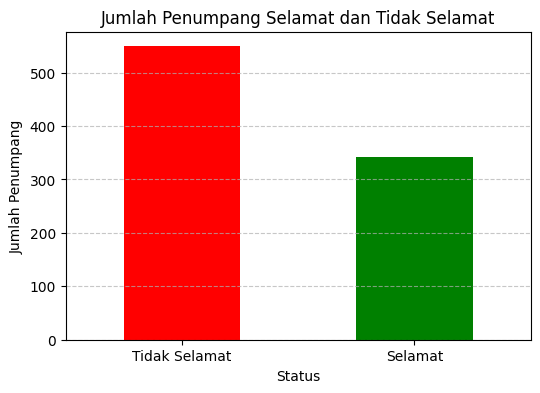

In [8]:
plt.figure(figsize=(6,4))
survival_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Jumlah Penumpang Selamat dan Tidak Selamat')
plt.xlabel('Status')
plt.ylabel('Jumlah Penumpang')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Dapat dilihat pada tabel frekuensi Survived bahwa jumlah penumpang yang selamat adalah 342 penumpang. Sedangkan jumlah penumpang yang tidak selamat adalah 549 penumpang.

In [9]:
# Hitung rata-rata umur
mean_age = data['Age'].mean()
# Hitung nilai minimum dan maksimum dari kolom 'Age'
min_age = data['Age'].min()
max_age = data['Age'].max()

# Filter data untuk mendapatkan penumpang termuda dan tertua
termuda = data[data['Age'] == min_age][['Name', 'Age', 'PassengerId']]
tertua = data[data['Age'] == max_age][['Name', 'Age', 'PassengerId']]

print(f"Rata‐rata umur: {mean_age:.2f} tahun")

# Sekarang Anda dapat menampilkan data penumpang termuda dan tertua
print("Penumpang Termuda:")
print(termuda)
print("\nPenumpang Tertua:")
print(tertua)

Rata‐rata umur: 29.70 tahun
Penumpang Termuda:
                                Name   Age  PassengerId
803  Thomas, Master. Assad Alexander  0.42          804

Penumpang Tertua:
                                     Name   Age  PassengerId
630  Barkworth, Mr. Algernon Henry Wilson  80.0          631


In [10]:
gender_counts = data['Sex'].value_counts()
print("\nJumlah berdasarkan jenis kelamin:")
print(gender_counts)


Jumlah berdasarkan jenis kelamin:
Sex
male      577
female    314
Name: count, dtype: int64


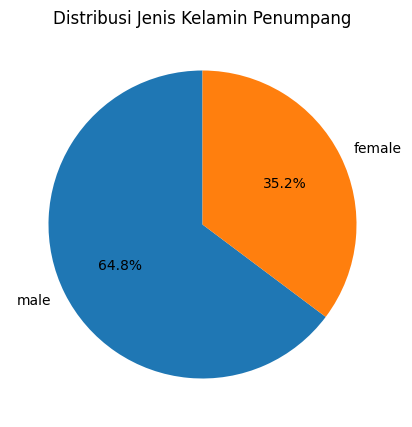

In [11]:
gender_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(5,5), startangle=90)
plt.title("Distribusi Jenis Kelamin Penumpang")
plt.ylabel('')
plt.show()

Berdasarkan perhitungan dan gambar diagram lingkaran, jelas bahwa penumpang yang lebih banyak yaitu berjenis kelamin laki-laki dengan jumlah 577 penumpang dan perempuan dengan jumlah 314 penumpang.

In [12]:
#Jumlah penumpang berdasarkan kelas (Pclass) dan persen kelas 1
pclass_counts = data['Pclass'].value_counts().sort_index()
pclass_percent = pclass_counts / total_penumpang * 100

In [13]:
# Tabel
pclass_data = pd.DataFrame({
    'Jumlah': pclass_counts,
    'Persen (%)': pclass_percent.round(2)
})
print("\nDistribusi Pclass:")
print(pclass_data)




Distribusi Pclass:
        Jumlah  Persen (%)
Pclass                    
1          216       24.24
2          184       20.65
3          491       55.11


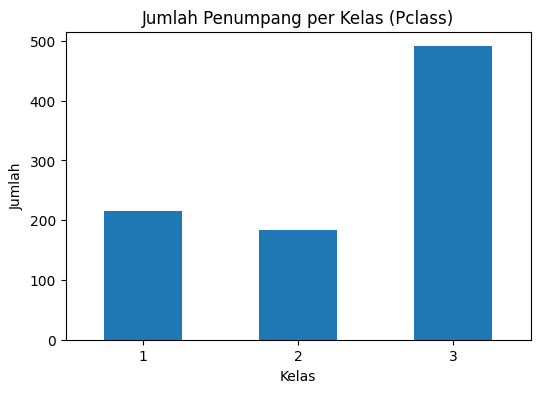

In [14]:
# Visualisasi
pclass_counts.plot(kind='bar', figsize=(6,4))
plt.title("Jumlah Penumpang per Kelas (Pclass)")
plt.xlabel("Kelas")
plt.ylabel("Jumlah")
plt.xticks(rotation=0)
plt.show()

# 2. PREPROCESSING

In [15]:
#melihat statistika deskriptif
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Berdasarkan output diatas, dapat disimpulkan bahwa dataset tersebut, memiliki total: 12 kolom, dengan jumlah maksimal baris untuk setiap kolom sebanyak: 891 baris. Akan tetapi terdapat beberapa kolom yang memiliki jumlah baris < 891, sehingga dapat disimpulkan bahwa terdapat missing value pada data tersebut. Oleh karena itu akan dilakukan proses identifikasi lebih lanjut.

**Deteksi Missing Value**

In [17]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


Berdasarkan output summarize tersebut, diperoleh bahwa kolom yang mengandung Missing Values (blanks/ N/A (Python : nan atau NaN)) adalah kolom Age, Cabin dan Embarked.

In [18]:
#mengetahui jumlah missing value di seluruh dataset
data.isnull().sum().sum()

np.int64(866)

**Handling Missing Value**

Karena terdapat missing value, maka akan dilakukan handling missing value.

### 1. Age

In [19]:
#melihat isi dalam kolom Age
data['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [20]:
#jumlah missing value
np.sum(data['Age'].isnull())

np.int64(177)

Berdasarkan output tersebut, dapat dilihat bahwa kolom tersebut mengandung detail Missing Values : 'nan'. Pada kasus ini, masing-masing Missing Values tersebut akan diganti dengan rata-rata dari durasi keseluruhan data.


📌 Asumsi untuk kolom Age (Umur):

Age adalah data numerik (kontinu) yang menunjukkan umur penumpang kapal titanic. Penumpang tersebut terdiri dari umur 0,42 tahun - 80 tahun. Skenario logis untuk mengisi missing values yaitu menggunakan median karena lebih tahan terhadap outlier.

In [21]:
#mengisi missing value
data['Age']=data['Age'].fillna(data['Age'].median())

In [22]:
#jumlah missing value
np.sum(data['Age'].isnull())

np.int64(0)

# 2. Cabin

In [23]:
#melihat isi dalam kolom
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [24]:
#jumlah missing value
np.sum(data['Cabin'].isnull())

np.int64(687)

In [25]:
data['Cabin'] = data['Cabin'].fillna('Unknown')

In [26]:
#jumlah missing value
np.sum(data['Cabin'].isnull())

np.int64(0)

# 3. Embarked

In [40]:
#melihat isi dalam kolom
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [45]:
#mengisi missing value
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode())

In [46]:
#jumlah missing value
np.sum(data['Embarked'].isnull())

np.int64(0)

In [47]:
np.sum(data.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## CEK DAN PENANGANAN OUTLIER

1. **Boxplot**

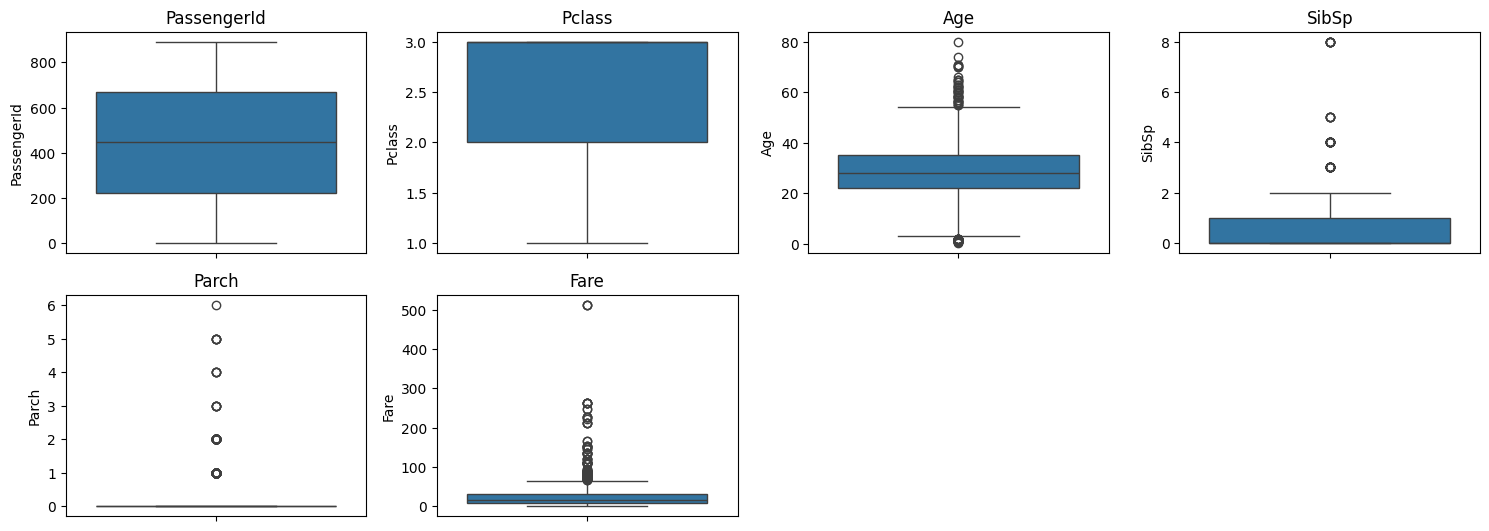

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik yang ingin dicek outliernya
num_cols = ['PassengerId','Pclass','Age', 'SibSp', 'Parch', 'Fare']
# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

2. **IQR**

In [56]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Kuartil 1
    Q3 = data[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols: # Now using the updated num_cols
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")

PassengerId: 0 outliers
Pclass: 0 outliers
Age: 66 outliers
SibSp: 46 outliers
Parch: 213 outliers
Fare: 116 outliers


Terdapat outlier pada kolom Age, SibSp,Parch, dan Fare.

Outlier itu adalah data yang nilai-nilainya sangat jauh berbeda dibandingkan data lainnya.Biasanya outlier terlihat "menyendiri" atau "melompat" dari pola umum data.

**PENANGANAN** **OUTLIER**

Adanya outlier dapat mengacaukan analisis statistik (seperti rata-rata). Selain itu juga dapat membuat model machine learning belajar pola yang salah. Oleh karena itu diperlukan penanganan outlier. Penanganan outlier menggunakan Winsorizing (Mengganti Outlier dengan batas IQR). Hal ini karena data tersebut penting dan tidak boleh dihapus, sehingga kita mengganti outlier dengan batas kuartil.

In [57]:
def winsorize_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Terapkan Winsorizing
for col in num_cols:
    winsorize_iqr(data, col)

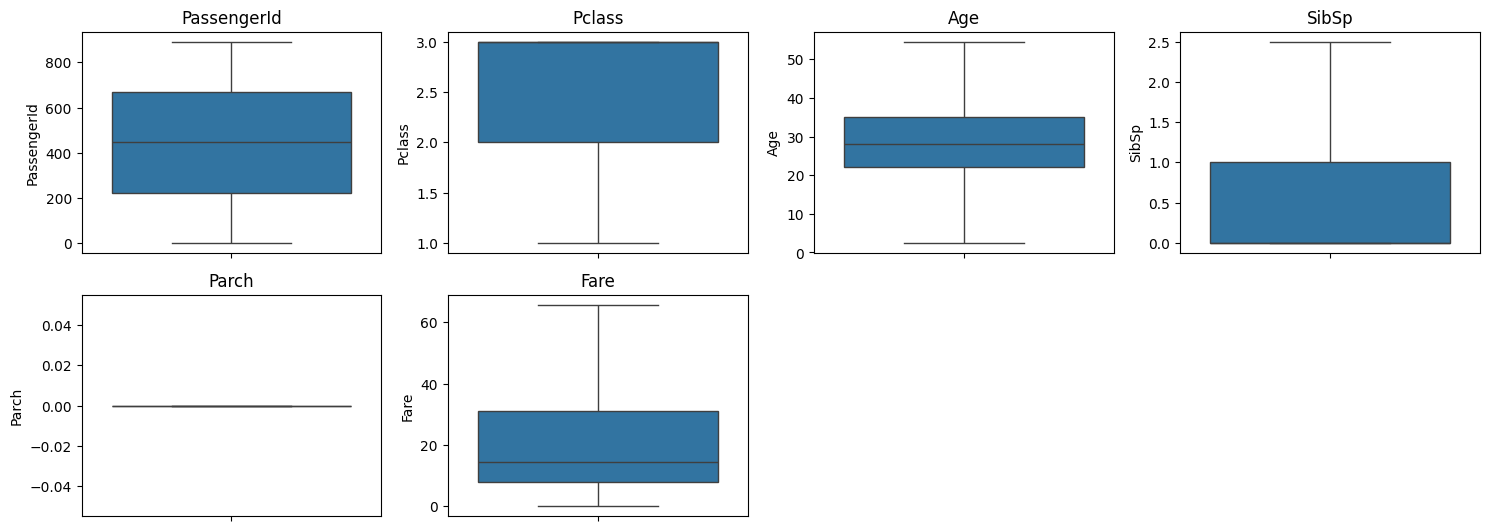

In [58]:
#cek boxplot lagi

num_cols = ['PassengerId','Pclass','Age', 'SibSp', 'Parch', 'Fare']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

**STANDARISASI**

In [60]:
from sklearn.preprocessing import StandardScaler

# Standarisasi kolom Age dan Fare
scaler = StandardScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

print("Data setelah standarisasi kolom Age dan Fare:")
print(data[['Age', 'Fare']].head())

Data setelah standarisasi kolom Age dan Fare:
        Age      Fare
0 -0.583432 -0.820552
1  0.742685  2.031623
2 -0.251903 -0.787578
3  0.494038  1.419297
4  0.494038 -0.781471


**ENCODING DATA KATEGORIK**

Pada tahap encoding, akan digunakan metode One-Hot Encoding (OHE) yang artinya mengubah kategori menjadi beberapa kolom biner (0/1). Digunakan jika jumlah kategori tidak terlalu banyak (menghindari dimensionalitas tinggi) hal ini akan menambah dimensi kolom data.

In [62]:
#melihat isi dalam kolom
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [63]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])

# Cek hasil mapping kategori ke angka
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'female': np.int64(0), 'male': np.int64(1)}


In [64]:
#melihat isi dalam kolom
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [65]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
le = LabelEncoder()
data['Embarked'] = le.fit_transform(data['Embarked'])

# Cek hasil mapping kategori ke angka
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'C': np.int64(0), 'Q': np.int64(1), 'S': np.int64(2)}


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    float64
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    float64
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    float64
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 83.7+ KB


## **MODELLING**

**MEMBAGI DATA MENJADI DATA TRAINING DAN TESTING**

Pembagian data menjadi training set dan testing set merupakan langkah penting dalam proses pembangunan model machine learning. Tujuan utama dari pembagian ini adalah untuk mengukur kemampuan generalisasi model, yaitu sejauh mana model dapat membuat prediksi yang akurat terhadap data baru yang belum pernah dilihat sebelumnya.

Jika seluruh data digunakan hanya untuk melatih (training) model tanpa ada data khusus untuk pengujian (testing), model dapat mengalami overfitting — yaitu kondisi di mana model terlalu menyesuaikan diri terhadap data pelatihan, termasuk terhadap noise atau pola-pola yang tidak umum. Akibatnya, model mungkin menunjukkan performa sangat baik pada data pelatihan, namun gagal memberikan hasil yang baik pada data baru atau data nyata.

In [74]:
#memisahkan data menjadi variabel x dan y
X=data.drop(['Survived'], axis=1)
y=data['Survived']

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import MinMaxScaler
# Definisikan fitur numerik yang akan distandarisasi
num_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
# Ekstrak fitur numerik
X_train_numeric = X_train[num_cols]
X_test_numeric = X_test[num_cols]

scaler = MinMaxScaler()
# Sesuaikan scaler dengan data pelatihan dan transformasikan
X_train_scaled = scaler.fit_transform(X_train_numeric)
# Transformasikan data pengujian menggunakan scaler yang telah disesuaikan
X_test_scaled = scaler.transform(X_test_numeric)

# Perbarui fitur numerik dalam DataFrame asli
X_train[num_cols] = X_train_scaled
X_test[num_cols] = X_test_scaled

print(X_train)

     PassengerId  Pclass                                             Name  \
140        141.0     1.0                    Boulos, Mrs. Joseph (Sultana)   
439        440.0     0.5           Kvillner, Mr. Johan Henrik Johannesson   
817        818.0     0.5                               Mallet, Mr. Albert   
378        379.0     1.0                              Betros, Mr. Tannous   
491        492.0     1.0                              Windelov, Mr. Einar   
..           ...     ...                                              ...   
835        836.0     0.0                      Compton, Miss. Sara Rebecca   
192        193.0     1.0  Andersen-Jensen, Miss. Carla Christine Nielsine   
629        630.0     1.0                         O'Connell, Mr. Patrick D   
559        560.0     1.0     de Messemaeker, Mrs. Guillaume Joseph (Emma)   
684        685.0     0.5                Brown, Mr. Thomas William Solomon   

     Sex       Age  SibSp  Parch            Ticket      Fare    Cabin  \
14

Data dibagi dengan proporsi 80% untuk data pelatihan (training) dan 20% untuk data pengujian (testing). Proporsi ini digunakan karena memberikan cukup banyak data kepada model untuk belajar (80%) sehingga model dapat menangkap pola yang representatif dari data.
Di sisi lain, 20% data testing cukup untuk menguji performa model secara objektif.

# 1. NAIVE BAYES

Naive Bayes adalah algoritma klasifikasi berbasis teori probabilitas Bayes dengan asumsi bahwa setiap fitur (variabel input) bersifat independen satu sama lain terhadap kelas target.

Model ini menghitung probabilitas suatu data termasuk ke dalam kelas tertentu berdasarkan nilai-nilai fitur yang dimiliki data tersebut.

**Cara Kerja Naive Bayes:**
1. Menghitung probabilitas prior setiap kelas berdasarkan distribusi data pelatihan.

2. Menghitung likelihood: peluang masing-masing fitur diberikan sebuah kelas.

3. Menggunakan Teorema Bayes untuk menghitung probabilitas posterior setiap kelas

4. Memilih kelas dengan probabilitas posterior tertinggi sebagai prediksi.

In [88]:
# Drop kolom non-numerik yang tidak relevan untuk model
X_train = X_train.drop(['Name', 'Ticket', 'Cabin'], axis=1)
X_test = X_test.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [89]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)

In [91]:
# Hitung dan cetak akurasi
accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy of Naive Bayes: {accuracy:.4f}")

Accuracy of Naive Bayes: 0.7821


Output 0.7821 yang dihasilkan dari accuracy_score pada Naive Bayes menunjukkan tingkat akurasi dari model klasifikasi yang dilatih. Dalam konteks ini, angka 0.7821 berarti bahwa model berhasil memprediksi dengan benar sekitar 78,21% dari semua sampel pada data uji (y_test) yang telah digunakan.

# 2. NEURAL NETWORK

Neural Network atau jaringan saraf tiruan adalah model machine learning yang terinspirasi oleh struktur biologis otak manusia, khususnya cara kerja neuron. Dalam konteks klasifikasi, kita menggunakan Multilayer Perceptron (MLP), yaitu jaringan saraf berlapis-lapis.

**Cara Kerja Neural Network:**
1. Forward Propagation:Data masuk dari input layer, dihitung ke hidden layer, dan diteruskan ke output. Setiap neuron menghitung output berdasarkan bobot dan biasnya.

2. Menghitung Loss:Mengukur seberapa besar kesalahan prediksi dibandingkan dengan nilai sebenarnya menggunakan fungsi loss (contohnya Cross Entropy Loss untuk klasifikasi).

3. Backward Propagation:Model menghitung gradien dari loss terhadap setiap bobot menggunakan algoritma backpropagation. Bobot diperbarui menggunakan optimasi (contohnya dengan algoritma Gradient Descent) untuk meminimalkan loss.

4. Iterasi:Proses ini diulang (disebut epoch) hingga model mencapai performa optimal.

In [93]:
#Menguji parameter yang paling optimum untuk model

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)

# Drop kolom non-numerik yang tidak relevan untuk model
X = X.drop(['Name', 'Ticket', 'Cabin'], axis=1)  # Drop from original X

# Replace infinite values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with a suitable strategy (e.g., median)
X.fillna(X.median(), inplace=True)

# Tentukan parameter yang ingin diuji
parameters = {
    'hidden_layer_sizes': [(50,), (100,), (50, 30), (100, 50)],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [100, 200, 300]
}

# Buat model MLPClassifier
clf = MLPClassifier(random_state=100)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(clf, parameters, cv=cv_strategy)
# cv merupakan jumlah lipatan validasi silang (cross-validation)

# Lakukan pencarian grid pada data training
grid_search.fit(X, y) # Now using the modified X

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=MLPClassifier(random_state=100),
             param_grid={'hidden_layer_sizes': [(50,), (100,), (50, 30),
                                                (100, 50)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'max_iter': [100, 200, 300]})

In [94]:
# Tampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

Parameter terbaik: {'hidden_layer_sizes': (50, 30), 'learning_rate_init': 0.001, 'max_iter': 300}


In [95]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(50,),learning_rate_init=0.1,max_iter=100)

clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=100)

In [96]:
y_pred = clf.predict(X_test)

In [97]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       110
           1       0.73      0.75      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [98]:
from sklearn.metrics import accuracy_score

round(accuracy_score(y_test,y_pred),3)

0.799

Output 0.799 yang dihasilkan dari accuracy_score pada Neural Network menunjukkan tingkat akurasi dari model klasifikasi yang dilatih. Dalam konteks ini, angka 0.799 berarti bahwa model berhasil memprediksi dengan benar sekitar 79,9% dari semua sampel pada data uji (y_test) yang telah digunakan.

# 3. DECICION TREE

Decision Tree adalah salah satu algoritma supervised learning yang digunakan untuk tugas klasifikasi dan regresi.
Model ini bekerja dengan cara membagi dataset menjadi subset-subset berdasarkan fitur tertentu, membentuk struktur seperti pohon yang terdiri dari:

Root Node (Akar): Node pertama yang mewakili keseluruhan data.

Internal Nodes (Simpul Cabang): Menggambarkan keputusan berdasarkan fitur tertentu.

Leaf Nodes (Daun): Menunjukkan hasil akhir atau keputusan kelas.

**Cara Kerja Decision Tree:**
1. Memilih fitur terbaik untuk split:
Model akan memilih fitur yang paling memisahkan data berdasarkan kriteria tertentu, seperti: Gini Impurity dan Entropy (Information Gain)

2. Membagi data: Data dibagi menjadi cabang-cabang berdasarkan nilai dari fitur tersebut.

3. Mengulang proses: Pada setiap subset data, proses pemilihan fitur terbaik diulang hingga memenuhi kondisi tertentu.

4. Membuat prediksi:Untuk memprediksi data baru, model akan mengikuti jalur dari root ke leaf berdasarkan fitur-fiturnya.



In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [100]:
classifier=DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [101]:
y_pred=classifier.predict(X_test)

In [102]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[85 25]
 [19 50]]
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       110
           1       0.67      0.72      0.69        69

    accuracy                           0.75       179
   macro avg       0.74      0.75      0.74       179
weighted avg       0.76      0.75      0.76       179



In [104]:
# Evaluasi model
acc_dt = accuracy_score(y_test, y_pred)
print(f"Akurasi Decision Tree: {acc_dt:.4f}")

# Menampilkan classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Akurasi Decision Tree: 0.7542
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       110
           1       0.67      0.72      0.69        69

    accuracy                           0.75       179
   macro avg       0.74      0.75      0.74       179
weighted avg       0.76      0.75      0.76       179



In [105]:
from sklearn.metrics import accuracy_score

round(accuracy_score(y_test,y_pred),3)

0.754

Output 0.754 yang dihasilkan dari accuracy_score pada Decicion Tree menunjukkan tingkat akurasi dari model klasifikasi yang dilatih. Dalam konteks ini, angka 0.754 berarti bahwa model berhasil memprediksi dengan benar sekitar 75,4% dari semua sampel pada data uji (y_test) yang telah digunakan.

**Nilai evaluasi masing-masing model pada data uji adalah:**

a. Naive Bayes menunjukkan akurasi sekitar 78,21%.

b. Neural Network (menggunakan MLPClassifier) menghasilkan akurasi sekitar 79,9%.

c. Decision Tree memiliki akurasi sekitar 75,4%.

**Metrik evaluasi yang digunakan adalah:**

Accuracy: proporsi prediksi yang benar.

Precision: akurasi prediksi positif.

Recall: keberhasilan mendeteksi seluruh positif.

F1-Score: keseimbangan antara precision dan recall.

**ALGORITMA TERBAIK**

Neural Network (MLPClassifier) menunjukkan kinerja terbaik dengan akurasi sekitar 79%, mengungguli Decision Tree (75,4%) dan Naive Bayes (78,21%).

Penyebab keunggulan Neural Network adalah kemampuannya dalam mempelajari hubungan kompleks non-linear antar fitur dataset. Neural network dapat melakukan pembobotan otomatis terhadap fitur-fitur penting sehingga mampu menangkap pola tersembunyi yang mungkin tidak dapat ditangkap oleh model sederhana seperti Naive Bayes atau Decision Tree.

Naive Bayes mengasumsikan independensi antar fitur, padahal dalam kenyataannya data Titanic memiliki fitur yang saling berkorelasi (seperti kelas penumpang dan harga tiket), sehingga performanya sedikit lebih rendah.

Decision Tree dapat melakukan overfitting jika tidak diatur secara hati-hati, sehingga meskipun cukup baik, performanya sedikit di bawah Neural Network.



## **EVALUASI**

NILAI PRECISION DAN RECALL

In [118]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Inisialisasi dan latih model Neural Network (MLPClassifier)
model_nn = MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=100, random_state=100)
# Pastikan random_state diinisialisasi untuk reproduktibilitas
model_nn.fit(X_train, y_train) # Assuming X_train and y_train are already defined

# Prediksi pada data uji
y_pred = model_nn.predict(X_test)

# Buat classification report
report = classification_report(y_test, y_pred, output_dict=True)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Jawaban 4a: Precision dan Recall untuk penumpang selamat (label 1)
precision_selamat = report['1']['precision']
recall_selamat = report['1']['recall']

print(f"Precision untuk penumpang selamat (label 1): {precision_selamat:.2f}")
print(f"Recall untuk penumpang selamat (label 1): {recall_selamat:.2f}")

# Jawaban 4b: Jumlah penumpang diprediksi selamat dan yang benar-benar selamat
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# cm format: [[TN, FP], [FN, TP]]
# Jadi:
# - Prediksi selamat = TP + FP
# - Benar-benar selamat = TP

jumlah_prediksi_selamat = cm[0][1] + cm[1][1]
jumlah_benar_selamat = cm[1][1]

print(f"\nJumlah penumpang yang diprediksi selamat: {jumlah_prediksi_selamat} orang")
print(f"Jumlah yang benar-benar selamat: {jumlah_benar_selamat} orang")

# Perbaikan: Gunakan precision_selamat dan recall_selamat
print(f"\nPrecision untuk prediksi selamat: {precision_selamat:.2f}")
print(f"Recall untuk prediksi selamat: {recall_selamat:.2f}")

cm = confusion_matrix(y_test, y_pred)
predicted_survived = cm[1][0] + cm[1][1]
true_survived = cm[1][1]
print(f"\nJumlah prediksi selamat: {predicted_survived}")
print(f"Jumlah prediksi selamat yang benar: {true_survived}")

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.95      0.80       110
           1       0.79      0.32      0.45        69

    accuracy                           0.70       179
   macro avg       0.74      0.63      0.63       179
weighted avg       0.73      0.70      0.66       179

Precision untuk penumpang selamat (label 1): 0.79
Recall untuk penumpang selamat (label 1): 0.32

Confusion Matrix:
[[104   6]
 [ 47  22]]

Jumlah penumpang yang diprediksi selamat: 28 orang
Jumlah yang benar-benar selamat: 22 orang

Precision untuk prediksi selamat: 0.79
Recall untuk prediksi selamat: 0.32

Jumlah prediksi selamat: 69
Jumlah prediksi selamat yang benar: 22
